In [1]:
#드라이브-코랩 연동 
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [5]:
pwd

'/content'

In [7]:
import os
import tensorflow as tf
from tensorflow.keras import layers, Sequential

IMG_SIZE = 256

def main():
    BL1 = tf.keras.utils.load_img('/content/gdrive/MyDrive/dataset/gz/BL/BL-001.jpg')     ## 증가시키고 싶은 데이터의 경로를 넣어준다.
    CD1 = tf.keras.utils.load_img('/content/gdrive/MyDrive/dataset/gz/CD/CD-001.jpg')

    BL1_array = tf.keras.utils.img_to_array(BL1)
    CD1_array = tf.keras.utils.img_to_array(CD1)
    
    BL1_augmentation = Sequential([
        layers.Resizing(IMG_SIZE, IMG_SIZE),
        layers.Rescaling(1. / 255),
        layers.RandomCrop(150, 200)
    ])
    

    CD1_augmentation = Sequential([
        layers.Resizing(IMG_SIZE, IMG_SIZE),
        layers.Rescaling(1. / 255),
        layers.RandomFlip(),
        layers.RandomRotation(0.5)
    ])
    
    BL1_augmented_tensor = BL1_augmentation(BL1_array)
    BL1_augmented = tf.keras.utils.array_to_img(BL1_augmented_tensor.numpy())
    BL1_augmented.save("./BL1.jpg")
    
    print()
    
    CD1_augmented_tensor = CD1_augmentation(CD1_array)
    CD1_augmented = tf.keras.utils.array_to_img(CD1_augmented_tensor.numpy())
    CD1_augmented.save("./CD1.jpg")
  
    
    return BL1_augmentation, CD1_augmentation

if __name__ == "__main__":
    main()

## 상하좌우 반전 Image Augmentation

In [16]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt


BL1 = tf.keras.utils.load_img('/content/gdrive/MyDrive/dataset/gz/BL/BL-001.jpg')

BL1_array = tf.keras.utils.img_to_array(BL1)    ## 이미지 데이터 정보를 array형태로 변환
print(BL1_array.shape)

sample = expand_dims(BL1_array,0)  ## 차원확장
print(sample.shape)

(407, 383, 3)
(1, 407, 383, 3)


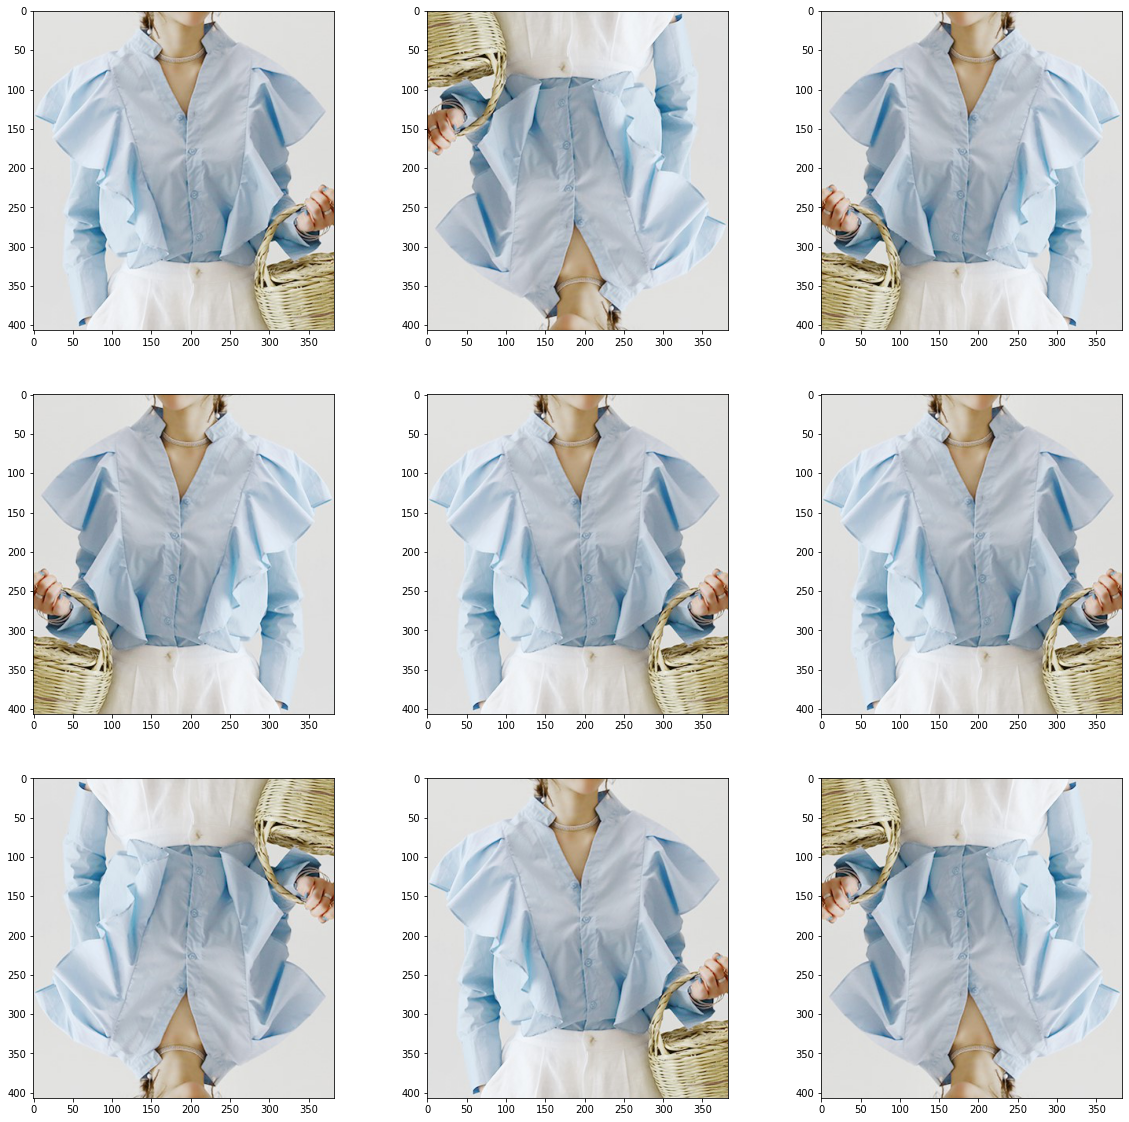

In [11]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True, vertical_flip = True , rescale=1./255)
obj = generator.flow(sample, batch_size=1)

fig = plt.figure(figsize=(20,20))

for i in range(9):                        # for문에 save를 넣어서 증가시킬 데이터 수집가능
  plt.subplot(3,3,i+1)
  image = obj.next()
  plt.imshow(image[0])


## Pytorch를 활용한 Data Augmentation

In [19]:
import torchvision.transforms as transforms

policy = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
                ])

In [20]:
policy = transforms.Compose([
                        transforms.RandomHorizontalFlip(p=0.5),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])
                        ])

In [21]:
policy = transforms.Compose([
                        transforms.RandomVerticalFlip(p=0.5),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])
                        ])

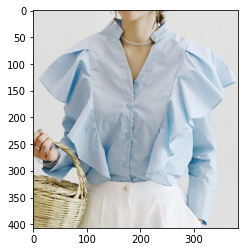

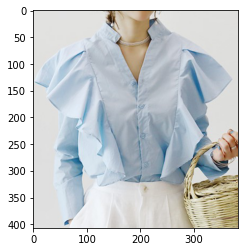

In [32]:
import torchvision
from torchvision import transforms, utils
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def visual_single(img):
  fig  = plt.figure()
  arr_ = np.squeeze(img)
  plt.imshow(arr_,cmap='gray')
  plt.show()

img_path = '/content/gdrive/MyDrive/dataset/gz/BL/BL-001.jpg'              # 활용할 데이터의 경로 입력

transform = transforms.Compose([
                        transforms.RandomHorizontalFlip(p=1)               # 데이터의 좌우반전 코드 
                        ])

img = Image.open(img_path)
visual_single(img)
img = transform(img)
visual_single(img)
